In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from matplotlib import pyplot as plt
import reg_helper as RHelper
import pandas as pd

In [2]:
folder = 'data/'
X = np.load(folder+'X_all.npy')
y = np.load(folder+'y_all.npy').reshape(-1)

In [3]:
from lightgbm import LGBMClassifier

In [4]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

In [5]:
# Armo indices de train, val
N_train = len(X)//2
cv_s = [(np.arange(N_train), np.arange(N_train, 2*N_train))]

In [6]:
cv_s

[(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
         34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
         51, 52, 53, 54, 55, 56, 57, 58]),
  array([ 59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
          72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
          85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
          98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
         111, 112, 113, 114, 115, 116, 117]))]

In [7]:
X_train = X[cv_s[0][0]]
y_train = y[cv_s[0][0]]
X_val = X[cv_s[0][1]]
y_val = y[cv_s[0][1]]

In [8]:
param_dist = {"max_depth": randint(1, 31),
              'learning_rate': np.logspace(-6, -1, 100),
              'reg_lambda': np.logspace(-8, -3, 100),
              'min_child_samples': randint(1, 20),
              'min_child_weight': np.logspace(-8, -1, 100)
              }
n_estimators = 2000
model = LGBMClassifier(n_estimators=n_estimators)
clf = RandomizedSearchCV(model, param_dist, n_jobs=-1, verbose=1, cv=cv_s, n_iter=5000)
clf.fit(X, y, early_stopping_rounds=100, eval_set=(X_val, y_val), verbose=0)

Fitting 1 folds for each of 5000 candidates, totalling 5000 fits


/opt/homebrew/Caskroom/miniconda/base/envs/hyperparam-tunning/lib/python3.12/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/homebrew/Caskroom/miniconda/base/envs/hyperparam-tunning/lib/python3.12/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/homebrew/Caskroom/miniconda/base/envs/hyperparam-tunning/lib/python3.12/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a

RandomizedSearchCV(cv=[(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58]),
                        array([ 59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
        72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
        85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
        98,  99, 100, 101, 102, 103, 104,...
       6.89261210e-05, 7.74263683e-05, 8.69749003e-05, 9.77009957e-05,
       1.09749877e-04, 1.23284674e-04, 1.38488637e-04, 1.55567614e-04,
       1.74752840e-04, 1.96304065e-04, 2.20513074e-04, 2.47707636e-04,
       2.78255940e-04, 3.12571585e-04, 3.51119173e-04, 3.94420606e-04,
       4.43062146e-04, 4.97702356e-04, 5.59081018e-04, 6.28029144e-04,
       7.05480231e-04, 7.92482898e-04, 8.90215085e-04, 1.00000000e-03])},
                   verbose=1)

In [9]:
clf.best_params_
# {'learning_rate': 0.0792482898353917,
#  'max_depth': 4,
#  'min_child_samples': 2,
#  'min_child_weight': 7.742636826811278e-05,
#  'reg_lambda': 3.678379771828634e-07}

{'learning_rate': 0.010974987654930568,
 'max_depth': 4,
 'min_child_samples': 3,
 'min_child_weight': 2.656087782946684e-08,
 'reg_lambda': 9.326033468832199e-07}

In [10]:
clf.best_score_

0.8135593220338984

In [11]:
clf.best_estimator_.score(X_val, y_val)

1.0

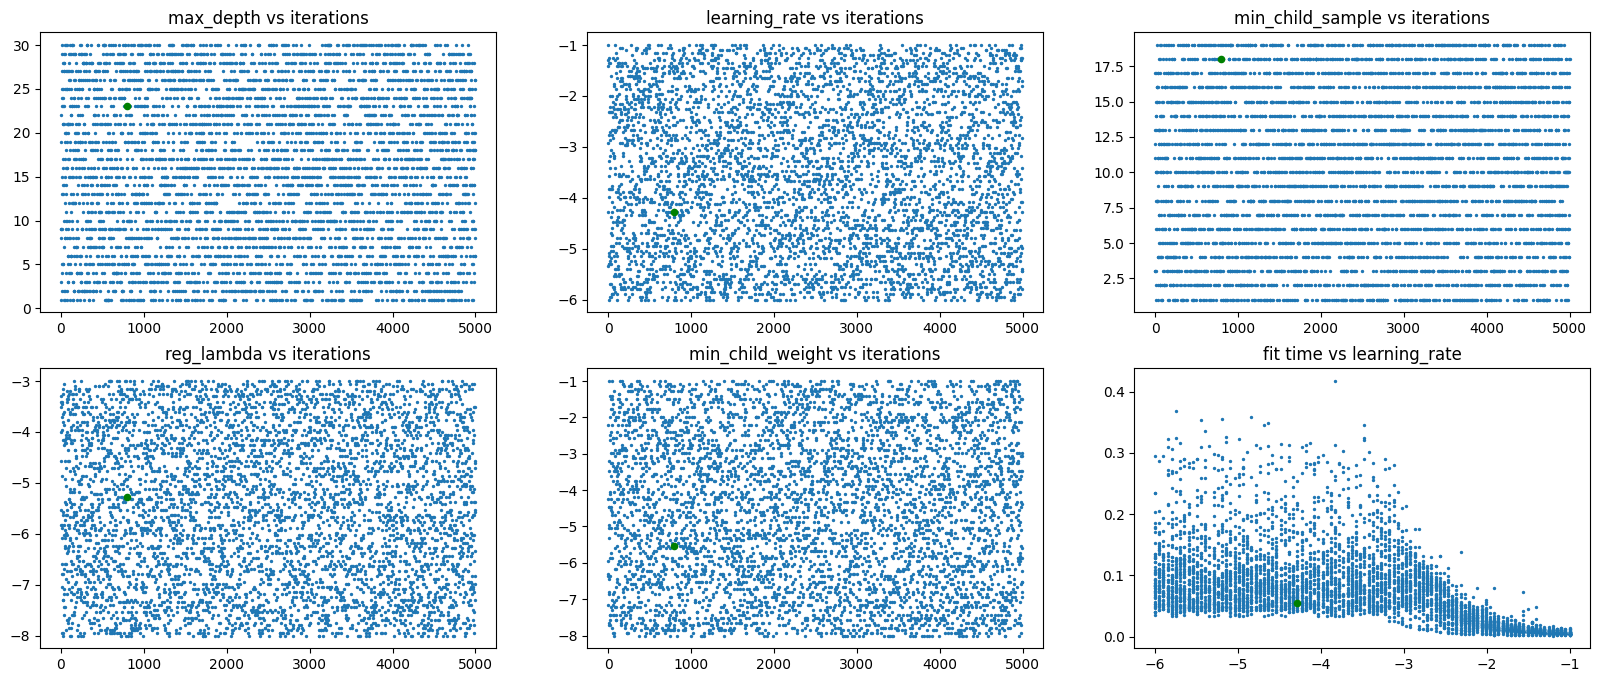

In [12]:
from plot_helper import plot_results
results_df = plot_results(clf)

In [13]:
results_df.drop(columns=['std_fit_time', 'mean_score_time', 'std_score_time', 'params', 
                         'std_test_score']).sort_values('rank_test_score').head(10)

mean_fit_time  param_learning_rate  param_max_depth  \
2657       0.085327             0.002719                3   
510        0.110344             0.001353                8   
4575       0.054447             0.002420                8   
3421       0.014745             0.008697                8   
418        0.023276             0.010975                4   
4947       0.028847             0.039442                3   
1700       0.156512             0.001205                7   
628        0.035645             0.003054                8   
733        0.010700             0.031257               28   
1163       0.010309             0.062803               22   

      param_min_child_samples  param_min_child_weight  param_reg_lambda  \
2657                        2            1.592283e-07      1.747528e-04   
510                         2            5.214008e-02      6.892612e-05   
4575                        2            1.484968e-04      5.722368e-08   
3421                        2            1.000000e-08      9.326033e-07   
418                         3            2.656088e-08      9.326033e-07   
4947                        2            5.214008e-02      4.229243e-06   
1700                        4            7.924829e-06      3.764936e-06   
628                         2            2.009233e-03      7.742637e-05   
733                         2            6.734151e-06      1.830738e-07   
1163                        2            2.477076e-05      1.707353e-05   

      split0_test_score  mean_test_score  rank_test_score  
2657           0.813559         0.813559                1  
510            0.813559         0.813559                1  
4575           0.813559         0.813559                1  
3421           0.813559         0.813559                1  
418            0.813559         0.813559                1  
4947           0.813559         0.813559                1  
1700           0.813559         0.813559                1  
628            0.813559         0.813559                1  
733            0.796610         0.796610                9  
1163           0.796610         0.796610                9

In [14]:
model = LGBMClassifier(n_estimators=n_estimators, **clf.best_params_)
fit_params={
    "early_stopping_rounds":100, 
        "eval_set" : [(X_val, y_val)],
        'eval_names': ['valid'],
        'verbose': 100,
       }
model.fit(X_train, y_train, **fit_params)

[100]	valid's binary_logloss: 0.528097
[200]	valid's binary_logloss: 0.484134
[300]	valid's binary_logloss: 0.480066


/opt/homebrew/Caskroom/miniconda/base/envs/hyperparam-tunning/lib/python3.12/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/homebrew/Caskroom/miniconda/base/envs/hyperparam-tunning/lib/python3.12/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


LGBMClassifier(learning_rate=0.010974987654930568, max_depth=4,
               min_child_samples=3, min_child_weight=2.656087782946684e-08,
               n_estimators=2000, reg_lambda=9.326033468832199e-07)

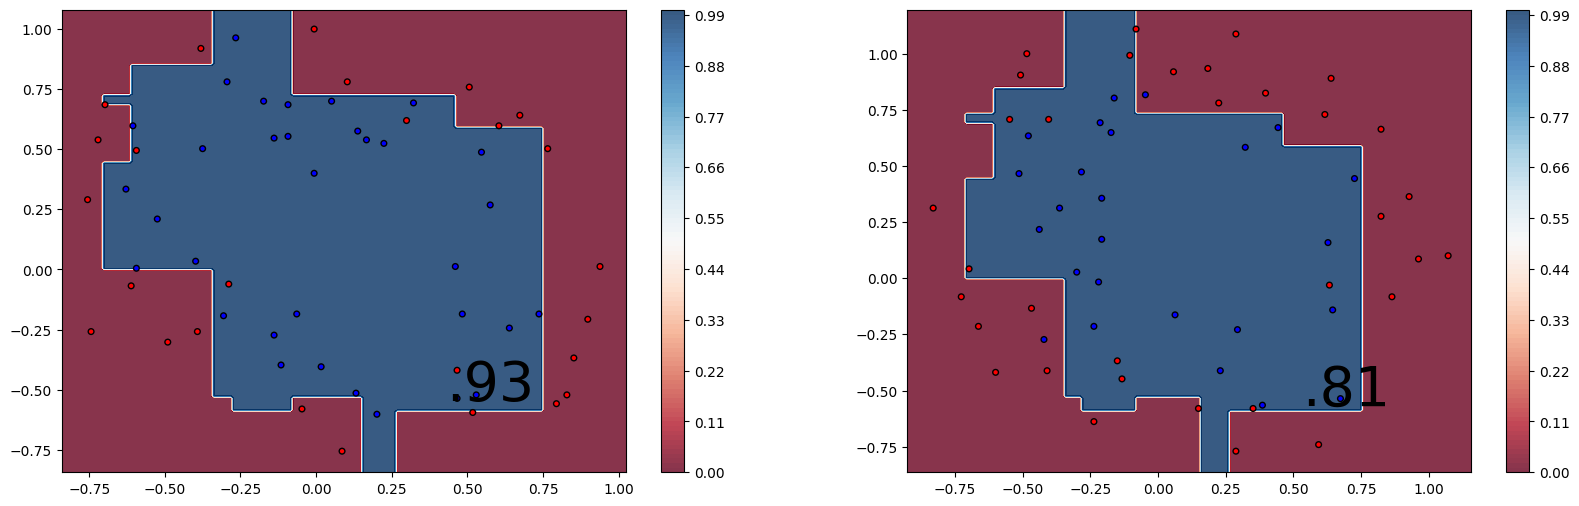

In [15]:
score_train = model.score(X_train, y_train)
score_test = model.score(X_val, y_val)
# Graficamos probabilidades en el plano de la combinación de todos los clasificadores
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
RHelper.plot_boundaries(X_train, y_train, score_train, model.predict,  mesh_res=200, ax=ax1, bound_line=False)
RHelper.plot_boundaries(X_val, y_val, score_test, model.predict,  mesh_res=200, ax=ax2, bound_line=False)